# SMARTCAB PROJECT

### To implement Q learning we need to define ###
* State Space
* The Learning Rate- Alpha
* Discount factor - Gamma
* Epsilon

### TASK :  Identify and update state:

### Defining the State Space

The state space can be defined based of the inputs that are sensed.
* Lights- Green or Red
* Oncoming - forward or None
* Left -  Left, Forward, Right, None
* Next Way Point- Left, Forward, Right, None

 The state space was chosen so as to have minimum complexity. Having a high number of parameters will increase the state space by that factor(number of categorical responses that variable has). Addition of right gives us no new information that is not already provied by the existing variables. Deadline is not a meaningful parameter to include in the state space.

The next way-point points the car towards the direction of the destination. So it is crucial. The other chosen variables are chosen so as to follow the traffic rules(**Lights**) and inorder to ensure that the car dosent crash with the other cars(**Oncoming and Left**). 


STATE= ( Color of Traffic Light, 
Is there an oncoming vehicle?,
Any Vehicle on the Right?, 
What direction is the destination?)

### New variables initalized :

### The Learning Rate- Alpha

The learning rate determines to what extent the newly acquired information will override the old information. A factor of 0 will make the agent not learn anything, while a factor of 1 would make the agent consider only the most recent information. In fully deterministic environments, a learning rate of **alpha = 1** is optimal. 


When the problem is stochastic, the algorithm still converges under some technical conditions on the learning rate, that require it to decrease to zero. In practice, often a constant learning rate is used.

In our case we choose alpha=1

### Discount factor - Gamma

The discount factor **gamma**  determines the importance of future rewards. 

A factor of 0 will make the agent "myopic" (or short-sighted) by only considering current rewards, while a factor approaching 1 will make it strive for a long-term high reward. 

If the discount factor meets or exceeds 1, the action values may diverge. For gamma =1, without a terminal state, or if the agent never reaches one, all environment histories will be infinitely long, and utilities with additive, undiscounted rewards will generally be infinite.

### Exploration -Exploitation value-Epsilon 

We introduce an additional term, epsilon. We then randomly generate a value, and if that value is less than epsilon, a random action is chosen, instead of following our normal tactic of choosing the max Q.

The best strategy to choose a vale of epsilon is to start from a high value close to 1 and allow it to decay over time. This would be an optimal choice because initially we want the agent to explore a lot and build the Q learning state space and when and all the states are explore we can confidently say that a random action may not be able to produce a higher Q value compared to the Q max  defned in the state space.


### TASK :  Implement Q-Learning :

### Finding the optimal policy
* Optimal route can be defined as the shortest path to destination without violating the traffic rules and hitting other cars. This is clearly not possible to model in our case since we cannot attach  a permanent 'q- value'to a state even after infinite iterations because the traffic lights are stochastic and cannot be predicted before hand.
* Optimal policy is determined by quantizing the enviorment to states and calculating the q-value for each state


### Selecting action according to your policy

### Exploration-Exploitation Tradeoff

#### 1. When you are exploring

Pick a random action among
   * Do nothing
   * Move Left
   * Move Right
   * Move Forward

#### 2. When you are exploiting

**If state has been previously encountered**- 
* Choose the action that maximizes the reward
* If there are multiple actions with same reward then pick a random action among them







**If state has not been previously encountered**-
* Pick a random action among
         * Move Left
         * Move Right
         * Move Forward

*  Update Q with  Q0 for all the actions where Q0 is the inital Q value assigned to all the states that are encountered for the first time.



### Q-Learning Formula

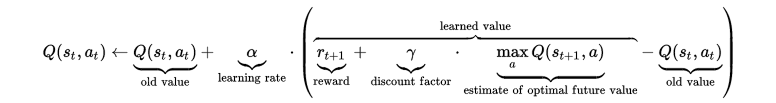

In [9]:
from IPython.display import Image 
Image(filename='image.png')
### The equation that was used.

 This exact formula was used for the Q learning process in agent.py.
 
 Q[self.state_old][self.action_old]= Q[self.state_old][self.action_old] + (self.alpha * (self.reward_old + (self.gamma * (max(Q[self.state].values()))) -  Q[self.state_old][self.action_old]))

Before learning has started, ** Q ** returns a fixed value(10). Then, each time the agent selects an action, and observes a reward and a new state that may depend on both the previous state and the selected action,** Q** is updated.

The core of the algorithm is a simple value iteration update. It assumes the old value and makes a correction based on the new information.

### Rewards

Positive Rewards
* Valid non-null move=  2
* Valid null move = 0.0
* Reached deadline = 10


Penalties
* Invalid move=-1.0


### Enhance the driving agent

### Performance of  Enhanced the driving agent

There are different ways to improve the performance of the agent. But first we need to define performance. There are several ways this can be done.

Two ways are:

1) Ensure that driving agent is able to reach the destination within allotted time. 
          * Maximize the number of successes out of 100 attempts.

2) Ensure that penalties are minimized. As the agent learns with each trial we need to ensure that the agent makes very few mistakes at the end. 
           * Minimze penalty incurred per move as time progreses.
           
           
In my implementation I have tried to look at both the above mentioned criteria. Primary goal was to ensure that agent doesnt make any violations at 90-99 trials. To do this we focus on  Minimzing penalty incurred for each step.  We need to optimze gamma epsilon and alpha for this purpose. This was done by trial end error.

Alpha  equal to one is the most appropiate value. This is because the enviroment is not stochastic. We know prior that the optimal move is the next_waypoint

Gamma equal to zero is the most appropiate value. No significance needs to be given to future rewards because some aspects of the simulation are random such as we can never predict the traffic lights beforehand.




### Epsilon greedy Exploration:

Agent is encouraged to explore by allowing epsilon to have smaller values that result in a random action. The epsilon value grows eventially to explot the knowledge the agent already posseses.

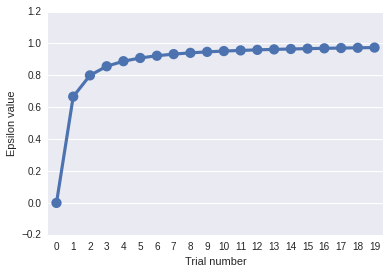

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

d=np.array(list(range(0,20)))
x=(d/(d+.5))
%matplotlib inline
df = pd.DataFrame()
df['x'] =x
df['y'] =d

ax=sns.pointplot('y','x',data=df,fit_reg=False,size=36)
ax.set(ylabel='Epsilon value', xlabel='Trial number')

###  Goal is to find: Epsilon value that Minimze penalty incurred per move and has maximum number of succeses

### First attempt- Exploit more

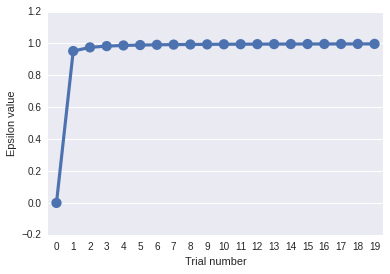

In [218]:
d=np.array(list(range(0,20)))
x=(d/(d+.05))
%matplotlib inline
df = pd.DataFrame()
df['x'] =x
df['y'] =d

ax=sns.pointplot('y','x',data=df,fit_reg=False,size=36)
ax.set(ylabel='Epsilon value', xlabel='Trial number')

* alpha                                                              :**1**
* gamma                              :**0**
* Number of Success out of 100 trials            :                  **    95 **
* Positve Rewards per each move trial number 0 to 10: **1.45**
* Positve Rewards per each move  trial number 90 to 99:**1.64**
* Negative Rewards per each move trial number 0 to 10:**-0.03**
* Negative Rewards per each move trial number 90 to 99:**-0.11**


### Comment

Performance enhancement:
* Positve Rewards per each move increases from 1.45 to 1.64
* Negative Rewards per each move decrease 4 times from -0.11 to 0.03
* More weight to exploitation resulted in less penalty per move

###  Second attempt - Explore more

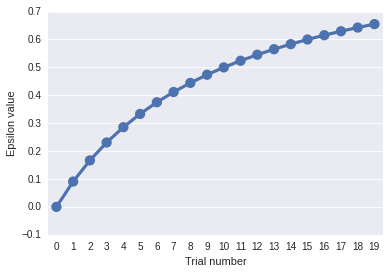

In [13]:
counter=np.array(list(range(0,20)))
epsilon=(counter/(counter+10.0))
%matplotlib inline
df = pd.DataFrame()
df['x'] =epsilon
df['y'] =counter

ax=sns.pointplot('y','x',data=df,fit_reg=False,size=36)
ax.set(ylabel='Epsilon value', xlabel='Trial number')

* alpha                                                              :**1**
* gamma                              :**0**
* Number of Success out of 100 trials            :                  **    74 **
* Positve Rewards per each move trial number 0 to 10: **1.37**
* Positve Rewards per each move  trial number 90 to 99:**1.23**
* Negative Rewards per each move trial number 0 to 10:**-0.24**
* Negative Rewards per each move trial number 90 to 99:**-0.26**

### Comment

* Performance became worse over time
* Lesser number of successes

### Final  Comment

* Explotitaion > Exploration for high performance
* Starting with a high epsilon value increases performance

### Final Optimal Policy

The final optimal policy depends on the epsion decay function. Since we know that alpha=1 and gamma=0 leads to best performance. The maximum number of states in the sysem is 64. Even under 100% exploration the agent only visited 37 of 64 states. Many of the states probably in the four corners are never visited since they are difficult to access and will not because  there is less prob 

## Agent.py

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import operator      
import random
from environment import Agent, Environment
from planner import RoutePlanner
from simulator import Simulator
import math

class LearningAgent(Agent):
    """An agent that learns to drive in the smartcab world."""
    success=0
    # Keeping track of rewards and penalties for each trial
    rewards=[]
    penalties=[]			
    def __init__(self, env):
        super(LearningAgent, self).__init__(env)  
        self.color = 'red'  # override color
        self.planner = RoutePlanner(self.env, self)  # simple route planner to get next_waypoint
        self.rewards=0
        self.penalties=0
        # TODO: Initialize any additional variables here
        self.Q = {}  # QTable
	#VARIABLES that wil be used for Q Value update        
        self.reward_old = None
        self.action_old = None
        self.state_old = None
        self.counter = 0 #counts steps in the trial
        self.action_argmax=None
        ##Initial conditions (Q0)    
        self.Q_0 = 0  # Q values at the begining
	#Different parameters
        self.epsilon=0
        self.gamma = 0 #Discount factor
        self.actions = Environment.valid_actions
        self.alpha = 1 #Learning rate counts
        self.trial_number=0 # counts the number of the trial
        self.penalty=0
        self.reward=0
    def reset(self, destination=None):
        self.epsilon =0
        # Store all rewards 
        LearningAgent.rewards.append((self.reward/(self.counter+1)))
        LearningAgent.penalties.append((self.penalty/(self.counter+1)))
        self.penalty=0
        self.reward=0	
        self.planner.route_to(destination)
        # TODO: Prepare for a new trip; reset any variables here, if required
        self.counter = 0
        self.epsilon=0
        self.trial_number=self.trial_number+1
    def update(self, t):
	    # Gather inputs for current state
        self.epsilon  =(self.counter/(self.counter+0.5))  
        self.next_waypoint = self.planner.next_waypoint()  # from route planner, also displayed by simulator
        inputs = self.env.sense(self)
        deadline = self.env.get_deadline(self)
        #Define the current state based on inputs sensed
     	self.state = (inputs['light'], inputs['oncoming'], inputs['left'],self.next_waypoint)




 # TODO: Select action according to your policy
        Q = self.Q 
        if self.state in self.Q :  # previously been in this state
                # small epsilon= exlporation    
           	if self.epsilon<random.random():
					action = random.choice(self.actions)
					print ("Exploratory action      " +str(action))
	        else:
                    states=max(self.Q[self.state].iteritems(), key=operator.itemgetter(1))
                    self.action_argmax=states[0]
                    print "Exploiting action     " +str(self.action_argmax)
                    action = self.action_argmax
				                    

        else :  # New state. choose random action
			Q.update({self.state : {None : self.Q_0, 'forward' : self.Q_0, 'left' : self.Q_0, 'right' : self.Q_0}}) 
			action = random.choice([None, 'forward', 'left', 'right'])  


# Execute action and get reward
        reward = self.env.act(self, action)  #what was the reward for the chosen action?
	
	if reward>0:
		self.reward+=reward
	else:
		self.penalty+=reward
	
    
# TODO: Learn policy based on state, action, reward
        if self.counter > 0 :  #make sure it is not the first step in a trial.
            Q[self.state_old][self.action_old]= Q[self.state_old][self.action_old] + (self.alpha * (self.reward_old + (self.gamma * (max(Q[self.state].values()))) -  Q[self.state_old][self.action_old]))
            
	   
#Store actions, state and reward as previous_ for use in the next cycle
        self.state_old = self.state
        self.action_old = action
        self.reward_old = reward
        self.counter += 1
	# count and write to files success/failures
	if self.env.done == True:
		LearningAgent.success=LearningAgent.success+1
                #print '........................................................Success' 	    
		file.write('  ({} {}),  '.format("   Succcesful in  :  ",str(self.counter)))
	elif deadline==0:
		file.write('  ({} {}),  '.format("   Failed in  :  ",str(self.counter)))
               # print '........................................................Failed' 	

    			
	
def run():
    """Run the agent for a finite number of trials."""
    # Set up environment and agent
    e = Environment()  # create environment (also adds some dummy traffic)
    a = e.create_agent(LearningAgent)  # create agent
    e.set_primary_agent(a, enforce_deadline=True)  # set agent to track

    # Now simulate it
    sim = Simulator(e, update_delay=.0000000001 )  # reduce update_delay to speed up simulation
    sim.run(n_trials=100)  # press Esc or close pygame window to quit

#print "Counter is  "+self.counter
   
if __name__ == '__main__':
    file=open('counts.txt','w')

    run()
    print " LearningAgent.success                                       "+str(LearningAgent.success)    
    #print LearningAgent.rewards
    #print LearningAgent.penalties
	


    print " Number of Success out of 100 trials                                  "+str(LearningAgent.success)    
    
	



Simulator.__init__(): Error initializing GUI objects; display disabled.
error: Couldn't open images/car-magenta.png
Simulator.run(): Trial 0
Exploiting action     forward
Exploiting action     forward
Exploiting action     left
Exploiting action     left
Exploiting action     forward
Exploiting action     left
Exploiting action     right
Exploiting action     right
Exploratory action      forward
Exploiting action     right
Exploiting action     left
Exploiting action     forward
Simulator.run(): Trial 1
Exploratory action      right
Exploiting action     left
Exploiting action     forward
Exploiting action     None
Exploiting action     forward
Simulator.run(): Trial 2
Exploratory action      right
Exploratory action      right
Exploiting action     right
Simulator.run(): Trial 3
Exploratory action      None
Exploiting action     left
Exploiting action     None
Exploiting action     None
Exploratory action      left
Exploiting action     forward
Exploiting action     forward
Exploitin

### Number of successes out of 100 trials:

In [4]:
print " Number of Success out of 100 trials                                  "+str(LearningAgent.success)    

 Number of Success out of 100 trials                                  994


### Postitve Rewards vs Trial

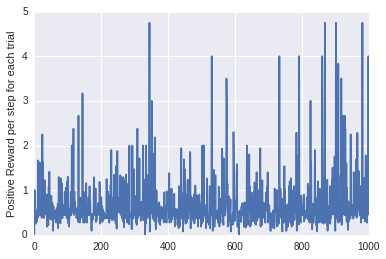

In [474]:
# positive rewards are  normalized by number of steps in the trial
%matplotlib inline
plt.plot(LearningAgent.rewards)
plt.ylabel('Positive Reward per step for each trial')

In [475]:
y=LearningAgent.rewards
x=list(range(1,101))
m,b = np.polyfit(x,y, 1)
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'yo', x, fit_fn(x), '--k')
plt.ylim(1, 2)


TypeError: expected x and y to have same length

### Postitve Rewards:  First 10 moves

In [476]:
np.array(LearningAgent.rewards[1:10]).mean()

0.49405030837779379

### Postitve Rewards : Last 10 moves

In [477]:
np.array(LearningAgent.rewards[90:99]).mean()

0.67980979384488149

## Penalties vs Trials

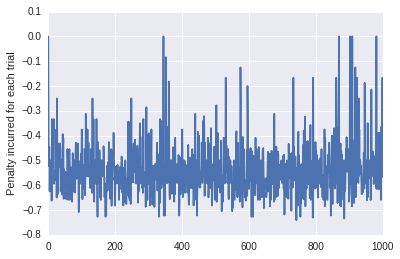

In [478]:
# normalized by number of steps in the trial
plt.plot(LearningAgent.penalties)
plt.ylabel('Penalty incurred for each trial')

In [479]:
y=LearningAgent.penalties
x=list(range(1,101))
m,b = np.polyfit(x,y, 1)
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'yo', x, fit_fn(x), '--k')

TypeError: expected x and y to have same length

### Penalties: Last 10 moves

In [480]:
np.array(LearningAgent.penalties[90:99]).mean()

-0.56027655945419108

### Penalties: First 10 moves

In [481]:
np.array(LearningAgent.penalties[1:10]).mean()

-0.53306183404867613

### References
* https://studywolf.wordpress.com/2012/11/25/reinforcement-learning-q-learning-and-exploration/
* https://en.wikipedia.org/wiki/Q-learning

In [14]:

import operator      
import random
from environment import Agent, Environment
from planner import RoutePlanner
from simulator import Simulator
import math

#### doubtful to remove or not
class LearningAgent(Agent):
    """An agent that learns to drive in the smartcab world."""
    success=0
    def __init__(self, env):
        super(LearningAgent, self).__init__(env)  
        self.color = 'red'  # override color
        self.planner = RoutePlanner(self.env, self)  # simple route planner to get next_waypoint

        # TODO: Initialize any additional variables here
        self.Q = {}  # QTable
	#VARIABLES that wil be used for Q Value update        
	self.reward_old = None
        self.action_old = None
        self.state_old = None
        self.counter = 0 #counts steps in the trial
        self.action_argmax=None
        ##Initial conditions (Q0)    
        self.Q_0 = 10  # Q values at the begining
	#Different parameters
        self.gamma = 1  #Discount factor
        self.actions = Environment.valid_actions
        self.epsilon =1-(self.counter/(self.counter+10))
        self.alpha = 1 #Learning rate counts
        self.trial_number=0 # counts the number of the trial

    def reset(self, destination=None):
        self.planner.route_to(destination)
        # TODO: Prepare for a new trip; reset any variables here, if required
	self.counter = 0
        self.trial_number=self.trial_number+1
    def update(self, t):
        # Gather inputs for current state
        self.next_waypoint = self.planner.next_waypoint()  # from route planner, also displayed by simulator
        inputs = self.env.sense(self)
        deadline = self.env.get_deadline(self)
        #Define the current state based on inputs sensed
     	self.state = (inputs['light'], inputs['oncoming'], inputs['left'],self.next_waypoint)




 # TODO: Select action according to your policy

        Q = self.Q 

        if self.state in self.Q :  # previously been in this state
                # small epsilon= exlporation    
           	if self.epsilon<random.random():
					action = random.choice(self.actions)
					#print ("Exploratory action      " +str(action))
	        else:
                    states=max(self.Q[self.state].iteritems(), key=operator.itemgetter(1))
                    self.action_argmax=states[0]
                    #print "Exploiting action     " +str(self.action_argmax)
                    action = self.action_argmax
				                    

        else :  # New state. choose random action
			Q.update({self.state : {None : self.Q_0, 'forward' : self.Q_0, 'left' : self.Q_0, 'right' : self.Q_0}}) 
			action = random.choice([None, 'forward', 'left', 'right'])  


# Execute action and get reward
        reward = self.env.act(self, action)  #what was the reward for the chosen action?

    
# TODO: Learn policy based on state, action, reward
        if self.counter > 0 :  #make sure it is not the first step in a trial.
            Q[self.state_old][self.action_old]= Q[self.state_old][self.action_old] + (self.alpha * (self.reward_old + (self.gamma * (max(Q[self.state].values()))) -  Q[self.state_old][self.action_old]))
            
	   
#Store actions, state and reward as previous_ for use in the next cycle
        self.state_old = self.state
        self.action_old = action
        self.reward_old = reward
        self.counter += 1
	# count and write to files success/failures
	if self.env.done == True:
		LearningAgent.success=LearningAgent.success+1
		file.write('  ({} {}),  '.format("   Succcesful in  :  ",str(self.counter)))
	elif deadline==0:
		file.write('  ({} {}),  '.format("   Failed in  :  ",str(self.counter)))
	

    			

def run():
    """Run the agent for a finite number of trials."""
    # Set up environment and agent
    e = Environment()  # create environment (also adds some dummy traffic)
    a = e.create_agent(LearningAgent)  # create agent
    e.set_primary_agent(a, enforce_deadline=True)  # set agent to track

    # Now simulate it
    sim = Simulator(e, update_delay=.0000000001 )  # reduce update_delay to speed up simulation
    sim.run(n_trials=100)  # press Esc or close pygame window to quit

#print "Counter is  "+self.counter
    
if __name__ == '__main__':
    file=open('counts.txt','w')

    run()
    print " LearningAgent.success                                       "+str(LearningAgent.success)    

Simulator.__init__(): Error initializing GUI objects; display disabled.
error: Couldn't open images/car-orange.png
Simulator.run(): Trial 0
Simulator.run(): Trial 1
Simulator.run(): Trial 2
Simulator.run(): Trial 3
Simulator.run(): Trial 4
Environment.step(): Primary agent ran out of time! Trial aborted.
Simulator.run(): Trial 5
Simulator.run(): Trial 6
Simulator.run(): Trial 7
Simulator.run(): Trial 8
Simulator.run(): Trial 9
Simulator.run(): Trial 10
Simulator.run(): Trial 11
Simulator.run(): Trial 12
Simulator.run(): Trial 13
Simulator.run(): Trial 14
Simulator.run(): Trial 15
Simulator.run(): Trial 16
Simulator.run(): Trial 17
Simulator.run(): Trial 18
Simulator.run(): Trial 19
Simulator.run(): Trial 20
Simulator.run(): Trial 21
Simulator.run(): Trial 22
Simulator.run(): Trial 23
Simulator.run(): Trial 24
Simulator.run(): Trial 25
Simulator.run(): Trial 26
Simulator.run(): Trial 27
Simulator.run(): Trial 28
Simulator.run(): Trial 29
Simulator.run(): Trial 30
Simulator.run(): Trial 